In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
demographics_df = pd.read_csv("demographics_data.csv").reset_index(drop = True)

In [3]:
demographics_df.head(5)

,Unnamed: 0,Crude_birth_rate,Crude_death_rate,Fertility_rate,DPT_immu,HepB3_immu,Measles_immu,HIV_incidence,TB_incidence,Homicides_per100000,Life_expectancy,Physicians_per1000_people,Population_density,Overweight_prevalence
0,0,17.995227,7.195875,2.335178,87.045374,86.436571,87.988729,0.61822,148.000000,6.405792,71.854614,1.933048,71.864149,6.200000
1,1,9.828199,9.553920,1.551680,93.800214,89.719856,93.554442,0.61822,102.948086,6.405792,80.659892,1.933048,35.249830,5.077778
2,2,18.174855,7.528826,2.414975,85.603028,84.737825,85.634452,0.23000,132.000000,5.779750,72.563274,1.933048,59.617881,5.600000
3,3,32.487000,6.423000,4.473000,66.000000,66.000000,64.000000,0.04000,189.000000,6.655561,64.486000,1.933048,56.937760,4.100000
4,4,11.780000,7.898000,1.617000,99.000000,99.000000,94.000000,0.03000,18.000000,2.289492,78.458000,1.933048,104.612263,5.077778


In [4]:
#drop the empty columns

df = demographics_df.drop(['Unnamed: 0'], axis =1)


In [5]:
#birth, fertility and TB
X = df[['Crude_birth_rate', 'Fertility_rate','TB_incidence' ]]
y = df[['Life_expectancy']]

In [6]:
X.head()

,Crude_birth_rate,Fertility_rate,TB_incidence
0,17.995227,2.335178,148.000000
1,9.828199,1.551680,102.948086
2,18.174855,2.414975,132.000000
3,32.487000,4.473000,189.000000
4,11.780000,1.617000,18.000000


In [7]:
y.head()

,Life_expectancy
0,71.854614
1,80.659892
2,72.563274
3,64.486000
4,78.458000


In [9]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
#predicting  the test set result
y_pred = regressor.predict(X_test)

In [17]:
y_pred

array([[76.23040033],
       [67.47216702],
       [62.77325052],
       [56.74164851],
       [76.63661312],
       [73.74934981],
       [79.28410033],
       [60.70168174],
       [78.44037465],
       [73.25332148],
       [78.18969683],
       [73.88912031],
       [67.80588696],
       [76.42567739],
       [64.69031149],
       [65.34658355],
       [79.68271127],
       [72.65446665],
       [64.16076833],
       [66.77134277],
       [67.2922021 ],
       [76.63509176],
       [80.07210776],
       [73.99303232],
       [75.44155813],
       [59.84837061],
       [79.16254587],
       [77.22877555],
       [76.5775713 ],
       [65.98175248],
       [76.51700768],
       [78.51953194],
       [73.61173871],
       [77.10718438],
       [74.95688649],
       [78.29918841],
       [75.99194187],
       [73.25073186],
       [79.22905597],
       [70.51215289],
       [77.81735511],
       [75.74586824],
       [78.41345485],
       [70.98058019]])

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [21]:
print(score)

0.793985878530947


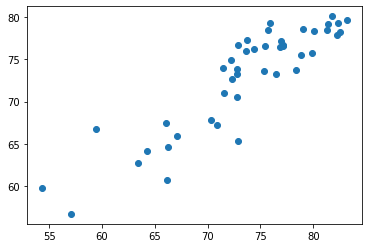

In [22]:
plt.scatter(y_test, y_pred)